In [1]:
import numpy as np

<img src="intro_files/intro.png" width="2400" height="1080" align="center"/>

<img src="intro_files/qft.png" width="2400" height="960" align="center"/>

## Google's Quantum Supremacy Demonstration
### _On specific^ problems QC can exponentially outperform Classical Computing_
_Nature (2019)_
<img src="intro_files/google-vs-ornl.png" width="600" height="300" align="center"/>
  
^: sampling from a probability distribution (classically hard to simulate)

## The Exponential Advantage of a Quantum Computer


The amount of "data" a quantum computer can process grows *exponentially*:  

**For $n$ quantum bits (qubit), the capacity is $2^n$.**   

The memory of a classical computer needed to simulate the computation of a 120 qubit computer:

In [23]:
n_qubits = 120
mem = 2**n_qubits/8*1e-12
print("Classical Memory Needed: {:2.2f} TB".format(mem))

Classical Memory Needed: 166153499473114480771072.00 TB


# Outline

### 1. Fundamentals: Qubits, Gates, Circuits

### 2. Quantum Hardware & Execution

### 3. Quantum Machine Learning

# Moore's Law & Quantum
<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Moore%27s_Law_Transistor_Count_1970-2020.png/1280px-Moore%27s_Law_Transistor_Count_1970-2020.png width="900"/>

### Transistor gate length $\le$ 1nm quantum physics effects will impose fundamental limits 

## Quantum  Companies

<img src=https://www.infosys.com/content/dam/infosys-web/en/insights/Images/quantum-supremacy-thumb.png />
source: infosys.com/insights/other-insights/quantum-supremacy.html

## Quantum Computing Applications


<img src="intro_files/quantum_applications.png" width="1000" height="800" />

source: ibm.com/thought-leadership/institute-business-value/report/quantum-healthcare

### QC is projected to have an advantage over classical computers in many of these applications!  

Exponential advantage in some applications:
- Factoring (__Schor's Algorithm__)
- Some Linear Algebra routines (__HHL algorithm__)
- Simulations: Chemistry, Materials, Physics ...
- Machine Learning (topological data analysis- __LGZ Algorithm__)

Polynomial Advantage in others:
- Unsorted Search (__Grover's Algorithm__)
- ...

## The Main Challenges

<img src="intro_files/colder-than-space.png" width="800" height="300" />  

- Operating Temperatures $\approx 100$'s mK ( 3 degrees colder than outer space).  
- Mechanical, Electrical, Radiation noise causes errors.  
- Current Qubit Operations with error rates $\approx 1 - 10\%$ (classical bits $\ll 0.0001 \%$)  
- Quantum Error Correction is expensive: 10-100's of physical qubits $\rightarrow$ 1 logical qubit   

# Quantum Circuits

A universal model of computation: __Qubits__ & __Gates__

<img src="intro_files/qubits.png" width="1000" height="600" align="center" />

In [25]:
# from qiskit.quantum_info import Statevector
# from qiskit.visualization import plot_state_qsphere, plot_bloch_multivector

# # Set the intial state of the simulator to the ground state using from_int
# state = Statevector.from_int(2, 2**2)

# plot_bloch_multivector(state)

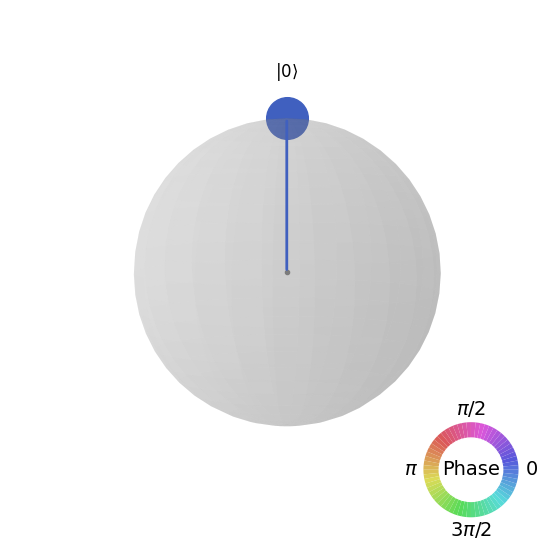

In [26]:
from qiskit.visualization import plot_state_qsphere, plot_bloch_multivector

# Set the intial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**1)

state.draw('qsphere')

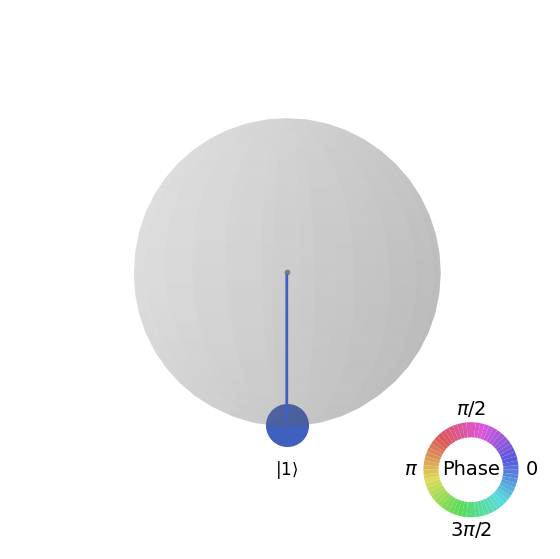

In [27]:
from qiskit.visualization import plot_state_qsphere, plot_bloch_multivector

# Set the intial state of the simulator to the ground state using from_int
state = Statevector.from_int(1, 2**1)

state.draw('qsphere')

<img src="intro_files/gates.png" width="740" height="400" align="center" />

# Both 0 AND 1 ?!!! 🧐
<img src=https://i.ytimg.com/vi/UjaAxUO6-Uw/maxresdefault.jpg width="600" height="600" align="center" title="TedEd"/>

In [4]:
h_gate = np.array([[1,1],[1,-1]]) / np.sqrt(2)
# let's check that h_gate is unitary
# h_gate_dag = np.conj(h_gate.T)
# h_gate_inv = np.linalg.inv(h_gate)
# # print(h_gate_inv)
# np.allclose(h_gate_dag , np.linalg.inv(h_gate), rtol=1e-10)

In [5]:
zero_state = np.array([1,0])  # zero qubit
one_state = np.array([0,1])   # one qubit
out_state = h_gate @ zero_state # H |0> 
# print(f"H|0> = {out_state}")
all(out_state == (zero_state + one_state) / np.sqrt(2))

True

<img src="intro_files/superposition.png" width="900" height="800" align="left"/>

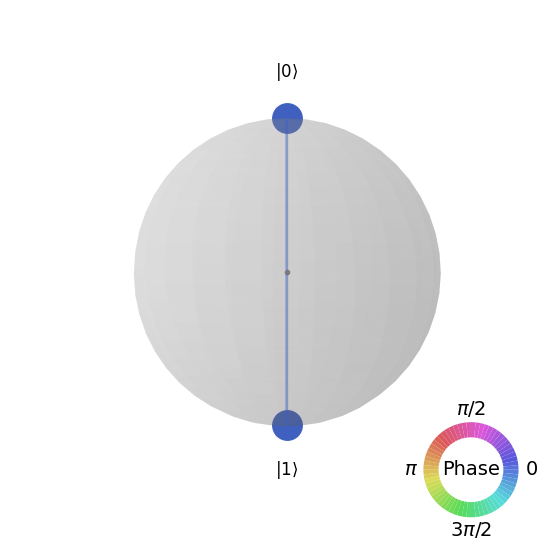

In [28]:
plot_state_qsphere(out_state)

- From _1 qubit and 1 gate_ we generated a uniform probability distribution over {0,1}   

- Sampling from the distribution --> measuring the qubit $|\psi\rangle$

🤯

# Multi-Qubit States

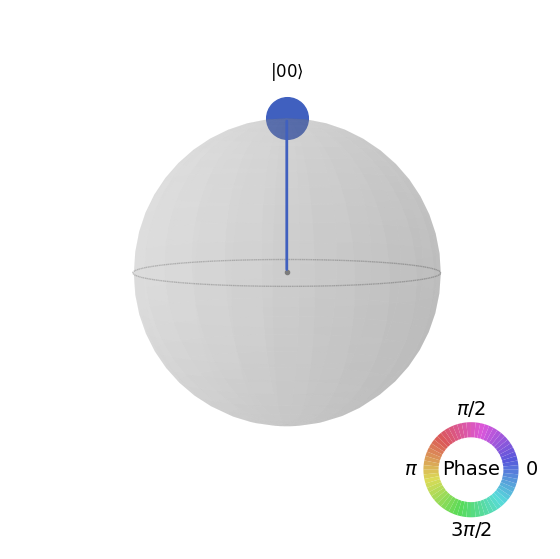

In [29]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere, plot_bloch_multivector

# Set the intial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**2)

plot_state_qsphere(state)

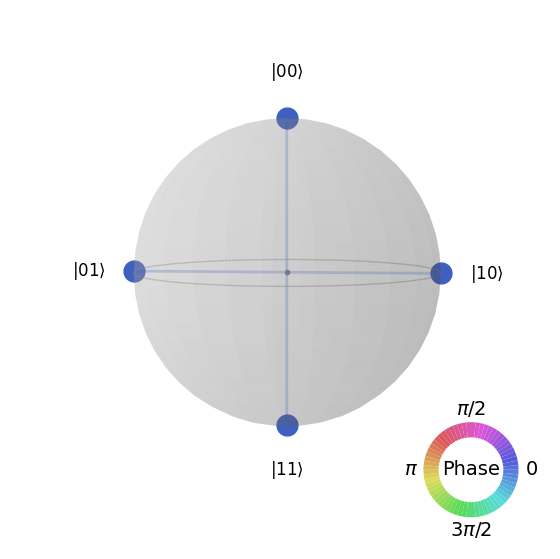

In [30]:
from qiskit.opflow import Plus
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere, plot_bloch_multivector

# Set the intial state of the simulator to the ground state using from_int
plot_state_qsphere(Plus^Plus)

## One last Gate 
(and first 2-qubit gate)  
<img src="intro_files/cnot.png" width="800" height="600" align="left"/>

<img src=https://wiki.bi0s.in/crypto/img/xor.png width="300" alt="source"/>


## First Quantum Circuit
Greenberger-Horne-Zeilinger (GHZ) Circuit: 
<img src=https://upload.wikimedia.org/wikipedia/en/thumb/5/57/The_quantum_logic_gates_that_generates_the_3-qubit_GHZ_state.png/450px-The_quantum_logic_gates_that_generates_the_3-qubit_GHZ_state.png width="500" height="600" />
src: wikipedia

<img src=https://media.geeksforgeeks.org/wp-content/uploads/20200422125425/Untitled-112-1024x520.jpg width="400" height="400" align="center"/>  

- With a GHZ circuit one can carry out __secret sharing__ similarly to standard cryptography...   
- _any_ eavesdropping on the quantum secret sharing protocol _will always_ introduce measurement errors.  

## Building the GHZ Circuit

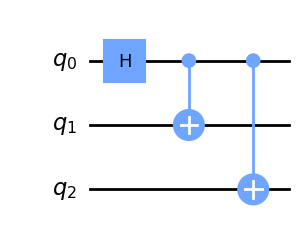

In [31]:
from qiskit import QuantumCircuit


# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)

circ.h(0)
circ.cx(0, 1)
circ.cx(0, 2)

circ.draw("mpl")

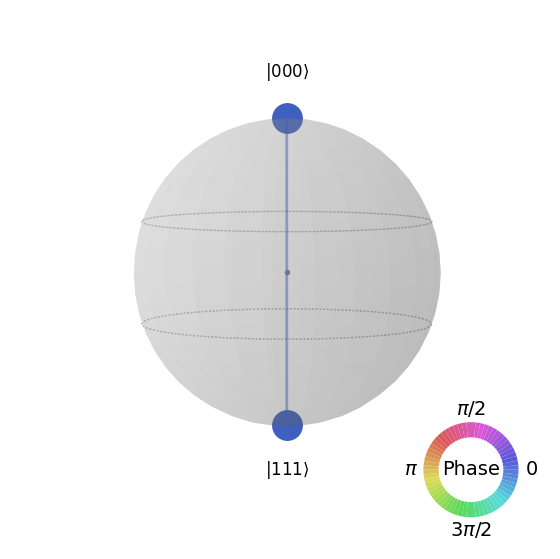

In [32]:
from qiskit.opflow import StateFn

state = StateFn(circ)
plot_state_qsphere(state)

## Executing a Circuit

**Qiskit** provides various simulators to execute quantum circuits, along with access to quantum hardware

We can execute our GHZ circuit using **Qiskit's** `Aer` simulator

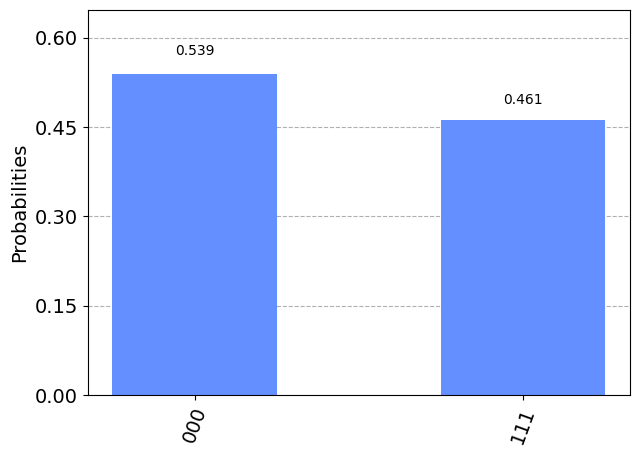

In [33]:
from qiskit import Aer
from qiskit.visualization import plot_histogram

circ.measure_all()

sim = Aer.get_backend("aer_simulator")

result = sim.run(circ, shots=1000).result()

plot_histogram(result.get_counts())

### IBM Backends

<img src="intro_files/ibm_backends.png" width="1000" height="800" align="left"/>

ibmqfactory.load_account:WARNING:2022-10-19 16:03:53,866: Credentials are already in use. The existing account in the session will be replaced.


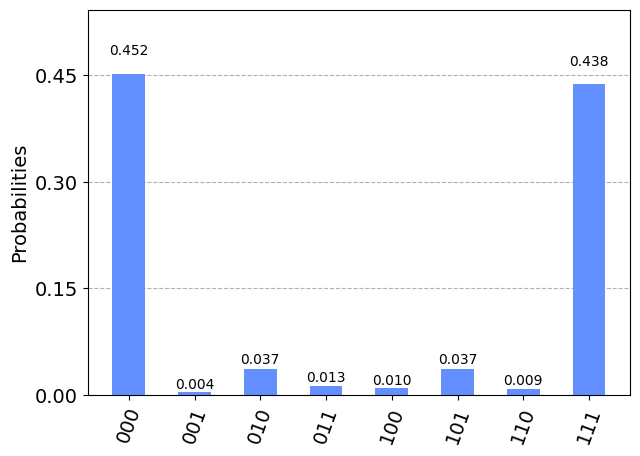

In [36]:
from qiskit import IBMQ, transpile

#An IBM Q Experience Account must be saved before running this cell
IBMQ.load_account()
provider = IBMQ.get_provider(hub="ibm-q-ncsu", group="anthem", project="advanced")

backend = provider.get_backend("ibmq_guadalupe")

result = backend.run(transpile(circ, backend), shots=1000).result()

plot_histogram(result.get_counts())